In [2]:
import numpy as np
import matplotlib.pyplot as plt
import json
import pprint
import os
import glob

In [4]:


# Set the parent directory path
parent_directory = "C:/Users/lqc/QM_5-28-24" #"path/to/parent/directory"
qubit = 3
target_string = 'ramseycorrelation'

# Use glob to recursively search for files containing the target string
files = glob.glob(f"{parent_directory}/2025-02-1[4567]/*{target_string}*", recursive=True)  #[1-2][90]
files = sorted(files, key=os.path.getmtime)  # Time order

file_names = []
for i, file in enumerate(files):
    print(i, file)
    file_names.append(file)

0 C:/Users/lqc/QM_5-28-24\2025-02-14\#64120_e_f_ramseycorrelation_141655
1 C:/Users/lqc/QM_5-28-24\2025-02-14\#64244_e_f_ramseycorrelation_201400
2 C:/Users/lqc/QM_5-28-24\2025-02-14\#64269_e_f_ramseycorrelation_212001
3 C:/Users/lqc/QM_5-28-24\2025-02-14\#64294_e_f_ramseycorrelation_222605
4 C:/Users/lqc/QM_5-28-24\2025-02-14\#64307_e_f_ramseycorrelation_225936
5 C:/Users/lqc/QM_5-28-24\2025-02-14\#64320_e_f_ramseycorrelation_233309
6 C:/Users/lqc/QM_5-28-24\2025-02-15\#64333_e_f_ramseycorrelation_000640
7 C:/Users/lqc/QM_5-28-24\2025-02-15\#64346_e_f_ramseycorrelation_004017
8 C:/Users/lqc/QM_5-28-24\2025-02-15\#64383_e_f_ramseycorrelation_021854
9 C:/Users/lqc/QM_5-28-24\2025-02-15\#64408_e_f_ramseycorrelation_032435
10 C:/Users/lqc/QM_5-28-24\2025-02-15\#64445_e_f_ramseycorrelation_050317
11 C:/Users/lqc/QM_5-28-24\2025-02-15\#64483_e_f_ramseycorrelation_064547
12 C:/Users/lqc/QM_5-28-24\2025-02-15\#64556_e_f_ramseycorrelation_100158
13 C:/Users/lqc/QM_5-28-24\2025-02-15\#64569_e_f

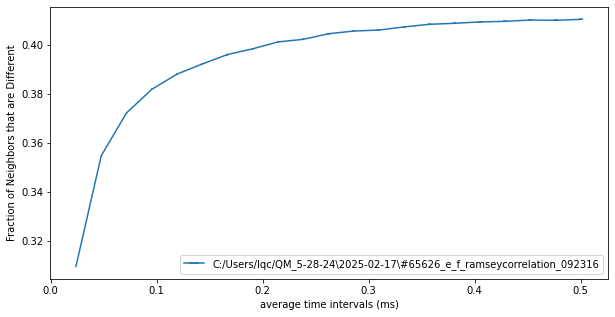

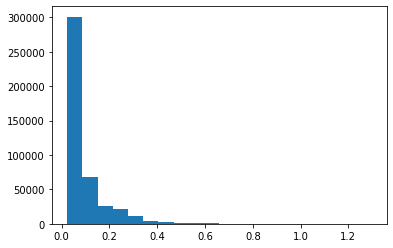

In [5]:
def rolling_correlation(Ithresholded, timestamps, n_max, n_step=1, n_sample=20):
    lnr = len(range(1,n_max,n_step))
    avg_delta_ts = np.zeros(lnr)    
    std_delta_ts = np.zeros(lnr)
    fractions = np.zeros(lnr)
    for i_n, n in enumerate(range(1,n_max, n_step)):
        rolling_sum = 0
        rolling_length = 0
        for i in range(0,n,int(np.floor(n/n_sample+1))):
            rolling_list = Ithresholded[i::n]
            diffs = np.abs(np.diff(rolling_list))
            rolling_sum += np.sum(diffs)
            rolling_length += len(diffs)

            rolling_times = timestamps[i::n]
            if i ==0:
                tdiffs = np.diff(rolling_times)
            else:
                tdiffs = np.concatenate((tdiffs, np.diff(rolling_times)))
        fractions[i_n] = rolling_sum/rolling_length
        avg_delta_ts[i_n] = np.mean(tdiffs)
        std_delta_ts[i_n] = np.std(tdiffs)
    return fractions, avg_delta_ts, std_delta_ts


def time_interval_analysis(Ithresholded, timestamps):
    tss=timestamps[Ithresholded==1]
    tsdiff = np.diff(tss)
    plt.hist(tsdiff, bins=20)
    plt.show()

fig = plt.figure(figsize=(10,5))
for i_file in range(56,57): #
    file_contents = np.load(file_names[i_file]+'/arrays.npz')
    # Open the file and load the data
    with open(file_names[i_file]+'/data.json', 'r') as file:
        data_dict = json.load(file)

    i_threshold = data_dict['RR_CONSTANTS']['q3_re']['ge_threshold']
    I2 = file_contents['measurement_data.q3_re.I']
    ts = file_contents['measurement_data.q3_re.timestamps']
    Ithresholded = np.array([1 if ii[0] > i_threshold else 0 for ii in I2])
    ts = np.array([tt[0]*4 for tt in ts])

    #nth nearest neighbor
    fractions, deltats, stdts = rolling_correlation(Ithresholded, ts, 22,1)
    plt.errorbar(deltats*1e-6, fractions, xerr=stdts*1e-6, label = file_names[i_file])

plt.xlabel('average time intervals (ms)')
plt.ylabel('Fraction of Neighbors that are Different')
plt.legend()
plt.show()

time_interval_analysis(Ithresholded, ts*1e-6)

2 Step Readout Post selection

1500000
1500000
1500000
1500000
1500000
1500000
1500000
1500000
1500000
1500000
1500000
1500000
1500000
1500000
1500000
1500000
1500000
1500000
1500000
1500000
1500000
1500000
1500000
1500000
1500000
1500000


KeyboardInterrupt: 

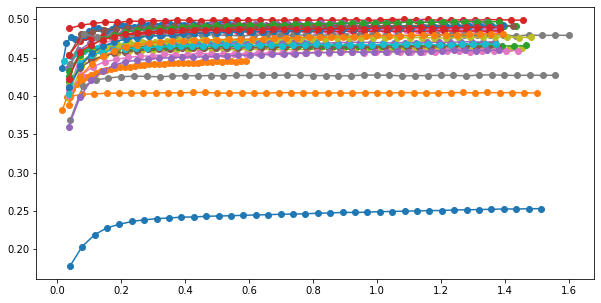

In [339]:
fig = plt.figure(figsize=(10,5))
for iif in range(len(file_names)): #

    # fn = 'C:/Users/lqc/QM_5-28-24/2025-02-12/#63375_e_f_ramseycorrelation_103932'
    fn = file_names[iif]
    file_contents = np.load(fn+'/arrays.npz')
    # Open the file and load the data
    with open(fn+'/data.json', 'r') as file:
        data_dict = json.load(file)

    ef_threshold = data_dict['RR_CONSTANTS']['q3_re']['ge_threshold']
    ge_threshold = data_dict['RR_CONSTANTS']['q3_rr']['ge_threshold']
    I2 = file_contents['measurement_data.q3_re.I']
    Ige = file_contents['measurement_data.q3_re.Ige']
    # print(len(I2))
    ts = file_contents['measurement_data.q3_re.timestamps']
    Ithresholded = np.array([1 if ii[0] > ef_threshold else 0 for ii in I2])
    Igethresholded = np.array([1 if ii[0] > ge_threshold else 0 for ii in Ige])
    ts = np.array([tt[0]*4 for tt in ts])
    # Remove all data points where we measured g
    ts = ts[Igethresholded==1]
    Ithresholded = Ithresholded[Igethresholded==1]
    I2post = I2[Igethresholded==1]


    #nth nearest neighbor
    fractions, deltats, stdts = rolling_correlation(Ithresholded, ts,40,1,40)
    plt.errorbar(deltats*1e-6, fractions, xerr=stdts*1e-6, label = file_names[iif], linestyle='-', fmt='o')
plt.xlabel('average time intervals (ms)')
plt.ylabel('Fraction of Neighbors that are Different')
plt.legend()
plt.show()

    # time_interval_analysis(Ithresholded, ts*1e-6)
# print(deltats)

1500000


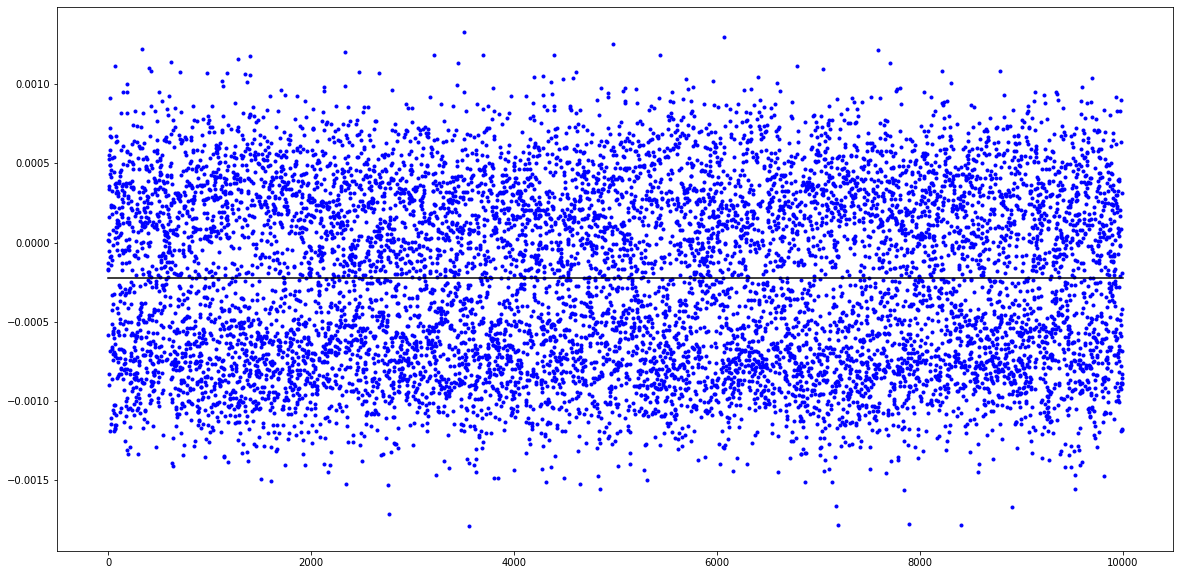

In [333]:
i_slice = 10_000

fn = file_names[0]
file_contents = np.load(fn+'/arrays.npz')
# Open the file and load the data
with open(fn+'/data.json', 'r') as file:
    data_dict = json.load(file)

ef_threshold = data_dict['RR_CONSTANTS']['q3_re']['ge_threshold']
ge_threshold = data_dict['RR_CONSTANTS']['q3_rr']['ge_threshold']
I2 = file_contents['measurement_data.q3_re.I']
Ige = file_contents['measurement_data.q3_re.Ige']
print(len(I2))
ts = file_contents['measurement_data.q3_re.timestamps']
Ithresholded = np.array([1 if ii[0] > ef_threshold else 0 for ii in I2])
Igethresholded = np.array([1 if ii[0] > ge_threshold else 0 for ii in Ige])
ts = np.array([tt[0]*4 for tt in ts])
# post-select
ts = ts[Igethresholded==1]
Ithresholded = Ithresholded[Igethresholded==1]
I2post = I2[Igethresholded==1]
fig = plt.figure(figsize=(20,10))
dat=I2post[:i_slice]
plt.plot(dat, 'b.')
plt.plot([0,len(dat)],[ef_threshold,ef_threshold],'k-')
# plt.plot(Ige[:i_slice], 'r.')
# plt.plot([0,len(dat)],[ge_threshold,ge_threshold],'k--')

Monte Carlo Correlation

In [14]:
lags = np.concatenate((np.arange(1,40,1),np.arange(50,151,10)))
n_samples = 5_000

t_diffs_dict = {}
i_diffs_dict = {}
for iif in range(57,58): #

    # fn = 'C:/Users/lqc/QM_5-28-24/2025-02-12/#63375_e_f_ramseycorrelation_103932'
    fn = file_names[iif]
    file_contents = np.load(fn+'/arrays.npz')
    # Open the file and load the data
    with open(fn+'/data.json', 'r') as file:
        data_dict = json.load(file)

    ef_threshold = data_dict['RR_CONSTANTS']['q3_re']['ge_threshold']
    ge_threshold = data_dict['RR_CONSTANTS']['q3_rr']['ge_threshold']
    I2 = file_contents['measurement_data.q3_re.I']
    Ige = file_contents['measurement_data.q3_re.Ige']
    # print(len(I2))
    ts = file_contents['measurement_data.q3_re.timestamps']
    Ithresholded = np.array([1 if ii[0] > ef_threshold else 0 for ii in I2])
    Igethresholded = np.array([1 if ii[0] > ge_threshold else 0 for ii in Ige])
    ts = np.array([tt[0]*4 for tt in ts])
    # Remove all data points where we measured g
    ts = ts[Igethresholded==1]
    Ithresholded = Ithresholded[Igethresholded==1]
    I2post = I2[Igethresholded==1]

    all_I_diffs = np.zeros(n_samples*len(lags))
    all_t_diffs = np.zeros(n_samples*len(lags))
    for i_l, lag in enumerate(lags):
        # -lag -1 to avoid indices out of bounds
        indices = np.random.choice(len(Ithresholded)-lag-1,n_samples,replace=False)
        lagged_indices = indices + lag

        I_base_values = Ithresholded[indices]
        I_lag_values = Ithresholded[lagged_indices]
        t_base_values = ts[indices]
        t_lag_values = ts[lagged_indices]

        I_diff = np.abs(I_lag_values - I_base_values)
        t_diff = t_lag_values - t_base_values

        all_I_diffs[i_l*n_samples:(i_l + 1)*n_samples] = I_diff
        all_t_diffs[i_l*n_samples:(i_l + 1)*n_samples] = t_diff

    # Sort the list by shorted to longest time interval
    all_I_diffs = [x for _, x in sorted(zip(all_t_diffs, all_I_diffs))]
    # sort and convert to ms
    all_t_diffs.sort()
    all_t_diffs = all_t_diffs*1e-6 
    t_diffs_dict[iif]=all_t_diffs
    i_diffs_dict[iif]=all_I_diffs

In [15]:
import json
# collect everything into a dictionary to save
save_t_diff = {key: list(value) for key, value in t_diffs_dict.items()}
save_i_diff = {key: list(value) for key, value in i_diffs_dict.items()}
json_dict = {
    'file_names': list(file_names),
    'Time_intervals_dict': save_t_diff,
    'Neighbor_difference_dict': save_i_diff,
}
formatted_dict = json.dumps(json_dict)
with open('montecarlocorrelation_02172025.json', 'w') as json_file:
    json.dump(formatted_dict, fp=json_file)

MemoryError: 

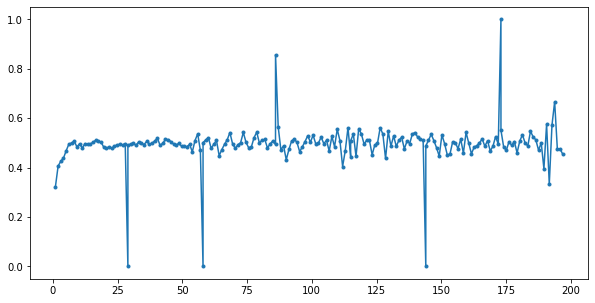

In [16]:
t_bin_width = 1 # width of histogram bins in ms

fig = plt.figure(figsize = (10,5))
i_plot = 0
for key in t_diffs_dict.keys():
    all_t_diffs = t_diffs_dict[key]
    all_I_diffs = i_diffs_dict[key]
    # Bin the data
    t0=0
    i_old = 0
    ts_binned = []
    tstd_binned = []
    Is_binned = []

    for i_t , t in enumerate(all_t_diffs):
        if t-t0 > t_bin_width:
            # entering a new bin
            t_bin = all_t_diffs[i_old:i_t]
            i_bin = all_I_diffs[i_old:i_t]

            ts_binned.append(np.mean(t_bin))
            tstd_binned.append(np.std(t_bin))
            Is_binned.append(np.mean(i_bin))

            t0 += t_bin_width
            i_old = i_t


    plt.errorbar(ts_binned, Is_binned, xerr=tstd_binned, label = file_names[iif], linestyle='-', fmt='.')
    i_plot +=1
    if i_plot > 4:

        plt.xlabel('average time intervals (ms)')
        plt.ylabel('Fraction of Neighbors that are Different')
        plt.legend()
        plt.xlim(0,0.7)
        plt.ylim(0.37,0.6)
        plt.show()
        i_plot = 0
        fig = plt.figure(figsize = (10,5))
        

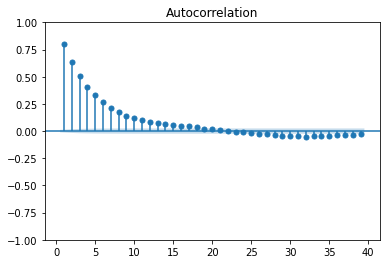

In [283]:
# pip install statsmodels
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# Sample data
data = binary_state

# Plot autocorrelation
plot_acf(data, lags=np.arange(1,40,1))
plt.show()


Model Random Coin Flips

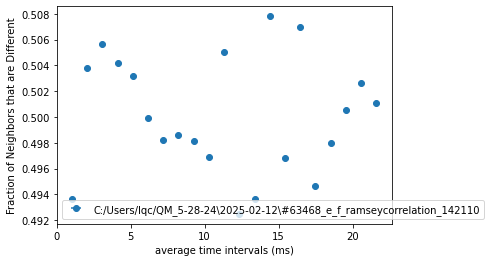

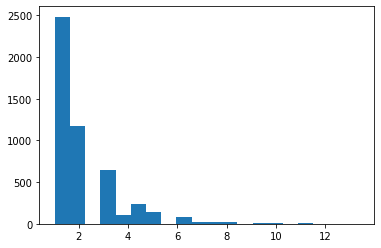

In [121]:
flips = np.random.choice([0,1],10_000)
fractions, deltats, stdts = rolling_correlation(flips, ts, 22,1)
plt.errorbar(deltats*1e-6, fractions, xerr=stdts*1e-6, label = file_names[iif], linestyle='none', fmt='o')
plt.xlabel('average time intervals (ms)')
plt.ylabel('Fraction of Neighbors that are Different')
plt.legend()
plt.show()

time_interval_analysis(flips, ts*1e-6)


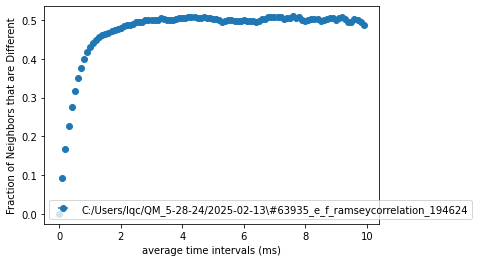

In [301]:
sample_timestep = 0.001 # ms
sample_duration = 3000 # ms
flip_rate = 1 # kHz

num_samples = int(round(sample_duration/sample_timestep))
simulated_timestamps = np.arange(0,sample_duration, sample_timestep)

binary_state = np.zeros(num_samples)

rand_at_timestep = np.random.random(num_samples)

convert_to_flip_event = lambda x: 1 if x<(sample_timestep*flip_rate) else 0

flip_events = list(map(convert_to_flip_event, rand_at_timestep))

flip_indices = [i for i, e in enumerate(flip_events) if e == 1]

ind = 0
flip_exponent = 0
for i_f in range(len(flip_indices)-1):
    binary_state[flip_indices[i_f]:flip_indices[i_f+1]] += (-1)**flip_exponent + binary_state[flip_indices[i_f]-1]
    flip_exponent += 1


fractions, deltats, stdts = rolling_correlation(binary_state, simulated_timestamps, 10000,100)
plt.errorbar(deltats, fractions, xerr=stdts, label = file_names[iif], linestyle='none', fmt='o')
plt.xlabel('average time intervals (ms)')
plt.ylabel('Fraction of Neighbors that are Different')
plt.legend()
plt.show()

# time_interval_analysis(binary_state, simulated_timestamps)